# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import tweepy
import json
import requests
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r=requests.get(url)
open('image_predictions.tsv','wb').write(r.content)

335079

In [3]:
df_2=pd.read_csv('image_predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
from tweepy.auth import OAuthHandler
auth = OAuthHandler("", "")
auth.set_access_token("", "")
redirect_url= auth.get_authorization_url()

In [6]:
api=tweepy.API(auth_handler=auth,
               parser=tweepy.parsers.JSONParser(),
               wait_on_rate_limit= True,
               wait_on_rate_limit_notify = True)

In [7]:
fails_dict = {}
count=0

In [8]:
start=timer()

In [9]:
with open('tweet_json.txt', 'w') as file:
    for tweet__id in df_1['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet__id))
        try:
            tweet = api.get_status(tweet__id, tweet_mode='extended')
            print("Success")
            file.write(json.dumps(tweet)+'\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet__id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [4]:
tweet_attr= []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_attr.append({ 'tweet_id' : json_data['id'],
                            'favorites': json_data['favorite_count'],
                            'retweets': json_data['retweet_count'],
                            'timestamp': json_data['created_at']})

In [5]:
df_3 = pd.DataFrame(tweet_attr,columns= ['tweet_id','favorites','retweets','timestamp'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_1.loc[df_1['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [9]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
an             7
Bailey         7
Daisy          7
Buddy          7
Bella          6
Jack           6
Stanley        6
Rusty          6
Jax            6
Koda           6
Dave           6
Oscar          6
Leo            6
Scout          6
Milo           6
Chester        5
            ... 
Keet           1
Alejandro      1
Hamrick        1
Sephie         1
Mookie         1
Jeremy         1
Alf            1
Edmund         1
Shiloh         1
Marvin         1
Acro           1
Sid            1
Lilah          1
Tassy          1
Simba          1
Schnozz        1
Marty          1
Poppy          1
Tito           1
Trigger        1
Snicku         1
Marlee         1
Jonah          1
Gòrdón         1
Kobe           1
Puff           1
Nugget         1
Mya           

In [10]:
df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1838,837471256429613056,https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg,1,Norwegian_elkhound,0.976255,True,keeshond,0.013990,True,seat_belt,0.002111,False
1173,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/73731...,1,cliff,0.439077,False,lakeside,0.062899,False,valley,0.039759,False
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
765,689143371370250240,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,English_springer,0.303781,True,papillon,0.165132,True,Welsh_springer_spaniel,0.149051,True
2014,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1326,757354760399941633,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,0.914667,True,whippet,0.047774,True,ice_lolly,0.015477,False
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False


In [11]:
df_2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
df_3

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,34129,7075,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,29610,5344,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,22298,3513,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,37296,7284,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,35649,7816,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,17986,2624,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,10471,1684,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,57355,15901,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,24760,3655,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,28238,6150,Wed Jul 26 15:59:51 +0000 2017


In [15]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id     2327 non-null int64
favorites    2327 non-null int64
retweets     2327 non-null int64
timestamp    2327 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [16]:
df_3.describe()

,tweet_id,favorites,retweets
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7119.165879,2493.470563
std,6.820795e+16,11061.463116,4222.212497
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1235.000000,500.500000
50%,7.178418e+17,3074.000000,1159.000000
75%,7.986547e+17,8690.500000,2886.000000
max,8.924206e+17,146017.000000,71394.000000


### Quality issues
1. Some inaccurate dog ratings in df_1.

2. Wrong datatype for tweet_id. It should be a string.

3. Timestamp should be of DateTime instead of object.

4. Some tweets arent orignal. They are retweets.

5. Some columns are useless like in_reply_to_status.

6. There are naming issues for dogs.

7. Null values mentioned as NaN or none

8. Some breed names are incorrect

### Tidiness issues
1. Dog category such as Doggo, puppo, etc. can be one column.

2. A breed column can be made based on p1,p2 and p3 values of prediction

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
df1_clean= df_1.copy()
df2_clean= df_2.copy()
df3_clean = df_3.copy()

### Issue #1:

#### Define:

The dog classification column can be one column instead of being in 4 different columns. We can use melt function.

#### Code

In [18]:
df_1.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None


In [19]:
df1_clean['stage']= None

In [20]:
df1_clean['stage']= df1_clean['doggo']+df1_clean['floofer']+df1_clean['pupper']+df1_clean['puppo']

In [21]:
df1_clean.stage.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [22]:
df1_clean.loc[df1_clean.stage == 'NoneNoneNoneNone', 'stage'] = None
df1_clean.loc[df1_clean.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
df1_clean.loc[df1_clean.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
df1_clean.loc[df1_clean.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
df1_clean.loc[df1_clean.stage == 'doggoNonepupperNone', 'stage'] = 'doggo, pupper'
df1_clean.loc[df1_clean.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
df1_clean.loc[df1_clean.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo, puppo'
df1_clean.loc[df1_clean.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo, floofer'

In [23]:
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [24]:
df1_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

### Issue #2:

#### Define:

We need to convert 3 dog prediction columns to one column,

#### Code

In [25]:
breed = []
confidence = []
#function which chooses best prediction for dog breed.
def breed_con(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('unknown')
        confidence.append(0)

df2_clean.apply(breed_con,axis=1)
df2_clean['breed']=breed
df2_clean['confidence']=confidence

In [26]:
df2_clean=df2_clean.drop(['p1','p2','p3','p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf'],axis=1)

In [27]:
df2_clean.loc[df2_clean.breed == 'unknown', 'breed'] = None

#### Test

In [28]:
df2_clean.sample(3)

,tweet_id,jpg_url,img_num,breed,confidence
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,None,0.000000
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_dog,0.622752
1909,852912242202992640,https://pbs.twimg.com/media/C9YnKK3VoAAxn1E.jpg,1,Great_Dane,0.783765


In [29]:
df2_clean.breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Siberian_husky                     20
Shih-Tzu                           20
Lakeland_terrier                   19
kuvasz                             19
Maltese_dog                        19
Shetland_sheepdog                  19
Rottweiler                         19
Italian_grey

### Issue #3:

#### Define:

Some columns are useless for our analysis. We need to delete them.

#### Code

In [30]:
df1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [31]:
df2_clean.drop(['jpg_url','img_num'],axis=1,inplace=True)

#### Test

In [32]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 221.0+ KB


### Issue #4:

#### Define:

We need to remove the retweets

#### Code

In [33]:
df1_clean=df1_clean[df1_clean.retweeted_status_id.isnull()]

#### Test

In [34]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         344 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 220.9+ KB


In [35]:
df1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

### Issue #6:

#### Define:
We need to create a master dataset which is combination of all 3 datasets.

#### Code

In [36]:
df=pd.merge(df1_clean,df2_clean,on =['tweet_id','tweet_id'],how ='inner')

In [37]:
df=pd.merge(df,df3_clean,on =['tweet_id','tweet_id'],how ='inner')

#### Test

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 14 columns):
tweet_id              1986 non-null int64
timestamp_x           1986 non-null object
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
stage                 305 non-null object
breed                 1678 non-null object
confidence            1986 non-null float64
favorites             1986 non-null int64
retweets              1986 non-null int64
timestamp_y           1986 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 232.7+ KB


### Issue #7:

#### Define:

We need to cast the datatype for tweet_id from int to string

#### Code

In [39]:
df.tweet_id=df.tweet_id.astype(str)

#### Test

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 14 columns):
tweet_id              1986 non-null object
timestamp_x           1986 non-null object
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
stage                 305 non-null object
breed                 1678 non-null object
confidence            1986 non-null float64
favorites             1986 non-null int64
retweets              1986 non-null int64
timestamp_y           1986 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 232.7+ KB


### Issue #8:

#### Define:

We need to change datatype for timestamp column and drop one of the timestamp column as we have 2 now

#### Code

In [41]:
df.timestamp_x=pd.to_datetime(df.timestamp_x)

In [42]:
df.rename(columns={'timestamp_x':'timestamp'},inplace=True)

In [43]:
df.drop('timestamp_y',axis=1,inplace=True)

#### Test

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 13 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
stage                 305 non-null object
breed                 1678 non-null object
confidence            1986 non-null float64
favorites             1986 non-null int64
retweets              1986 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 217.2+ KB


### Issue #9

#### Define:

We need to get extarct source in source column.

#### Code

In [45]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1948
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [46]:
df.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace = True)
df.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', inplace = True)
df.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', inplace = True)


#### Test

In [47]:
df.source.value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Issue #10

#### Define:

Many texts are same. That many its probaby the same tweet. We need only one

#### Code

In [48]:
df.drop_duplicates(subset='text',keep='first',inplace=True)

#### Test

In [49]:
df.text.value_counts()

This is Oscar and Oliver. Oliver shrunk Oscar. Oscar isn't pleased about it. Quite pupset tbh. Oliver doesn't seem to mind. Both 13/10 https://t.co/e3U4NReleC           1
After watching this video, we've determined that Pippa will be upgraded to a 12/10. Please enjoy https://t.co/IKoRK4yoxV                                                 1
We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT                                   1
This is Sansa. She's gotten too big for her chair. Not so smol anymore. 11/10 once a pupper, always a pupper https://t.co/IpAoztle2s                                     1
This is Cooper. He tries to come across as feisty but it never works for very long. 12/10 https://t.co/AVks8DjHwB                                                        1
Meet Sunny. He can take down a polar bear in one fell swoop. Fr*cken deadly af. 13/10 would pet with caution https://t.co/EMq8Ud6Ze1             

### Issue #11

#### Define:

Some rows have inconsistent denominators

#### Code

In [50]:
pd.set_option('display.max_colwidth', 200)
df[['tweet_id','text', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator
319,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
381,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
656,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
793,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
841,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
884,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
918,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
963,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
981,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


We need to manually edit these and their corresponding numerators. Some columns don't have scores. So we will drop them.

In [51]:
df.loc[3172, 'rating_numerator':'rating_denominator'] = [14,10]
df.loc[3536, 'rating_numerator':'rating_denominator'] = [13,10]
df.loc[3672, 'rating_numerator':'rating_denominator'] = [11,10]
df.loc[5284, 'rating_numerator':'rating_denominator'] = [10,10]
df.loc[7860, 'rating_numerator':'rating_denominator'] = [9,10]
df.drop(1524, inplace = True)

#### Test

In [52]:
pd.set_option('display.max_colwidth', 200)
df[['tweet_id','text', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator
319,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
381,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
656,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
793,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
841,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
884,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
918,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
963,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
981,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


### Issue #11

#### Define:

Some numerators have unexpectidly high values. We need to check them for errors. I will roud off numerators if there is decimal. I will also drop outliers.,

#### Code

In [53]:
df[['tweet_id','text', 'rating_numerator', 'rating_denominator']].query('rating_numerator >14')

,tweet_id,text,rating_numerator,rating_denominator
319,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
381,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
499,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
548,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
656,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
719,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
841,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
918,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
963,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0


In [54]:
df.loc[2192, 'rating_numerator':'rating_denominator'] = [11,10]
df.loc[5468, 'rating_numerator':'rating_denominator'] = [11,10]

### Issue #12

#### Define:

Some names have wrong values. We need to replace them.

In [55]:
df.name.value_counts()

None        544
a            55
Cooper       10
Oliver       10
Charlie      10
Lucy          9
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          7
Toby          7
Daisy         7
the           7
Bella         6
an            6
Stanley       6
Koda          6
Bo            6
Jax           6
Rusty         5
Leo           5
Oscar         5
Scout         5
Chester       5
Dave          5
Buddy         5
Louis         5
Bailey        5
Milo          5
           ... 
Dante         1
Dewey         1
Alfy          1
Gidget        1
Shiloh        1
Marty         1
Sailor        1
Schnozz       1
Baloo         1
Iroh          1
Striker       1
Akumi         1
Jackie        1
Ace           1
Jameson       1
Rizzo         1
Berkeley      1
Pinot         1
Cheesy        1
Arlen         1
Bubba         1
Bruno         1
Ambrose       1
Marvin        1
Acro          1
Sid           1
Lilah         1
Tassy         1
Simba         1
Mark          1
Name: name, Length: 934,

#### Code

In [56]:
for i in ['a','an','all','the','the','such']:
    df.name.replace(i,None,inplace=True)    

#### Test

In [57]:
df.name.value_counts()

None        575
Oliver       12
Cooper       10
Charlie      10
Penny         9
Lucy          9
Tucker        9
Daisy         8
Winston       8
Sadie         8
Toby          7
Lola          7
Stanley       7
Jax           6
Bella         6
Bo            6
Koda          6
Bailey        5
Leo           5
Milo          5
Dave          5
Scout         5
Gary          5
Louis         5
Buddy         5
Rusty         5
Oscar         5
Chester       5
Maggie        4
Dexter        4
           ... 
Bobble        1
Lipton        1
Ralphus       1
Loomis        1
Hero          1
Jonah         1
Marlee        1
Snicku        1
Ambrose       1
Ace           1
Jameson       1
Rizzo         1
Berkeley      1
Pinot         1
Cheesy        1
Arlen         1
Bubba         1
Bruno         1
Marvin        1
Doobert       1
Acro          1
Sid           1
Lilah         1
Tassy         1
Simba         1
Schnozz       1
Marty         1
Poppy         1
Tito          1
Mark          1
Name: name, Length: 929,

### Issue #13

#### Define:

As denominators of all ratings isnt same, we need to create standard rating.

In [58]:
df['rating']= None
df['rating']= 10*df.rating_numerator/df.rating_denominator

#### Test

In [59]:
df.rating.sample(10)

883      8.0
193     11.0
1804    10.0
187     13.0
39       5.0
687     10.0
1444    10.0
986     10.0
1064    12.0
521     11.0
Name: rating, dtype: float64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
df.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
df.breed.value_counts()[:3]

golden_retriever      158
Labrador_retriever    105
Pembroke               95
Name: breed, dtype: int64

Golden Retriever, Labrador Retriever and Pemborke are most popular breeds among posters.

In [62]:
(df.groupby('stage', as_index=False).mean()[['stage','rating']])

,stage,rating
0,doggo,11.870968
1,"doggo, floofer",11.000000
2,"doggo, pupper",11.000000
3,"doggo, puppo",13.000000
4,floofer,12.000000
5,pupper,10.714286
6,puppo,12.000000


Clearly, puupo gets best ratings as we would expect.

In [63]:
df.groupby('breed',as_index=False).mean().sort_values('rating',ascending=False)

,breed,rating_numerator,rating_denominator,confidence,favorites,retweets,rating
82,clumber,27.000000,10.000000,0.946718,6253.000000,1504.000000,27.000000
11,Bouvier_des_Flandres,13.000000,10.000000,0.082610,15517.000000,3620.000000,13.000000
54,Saluki,12.500000,10.000000,0.523054,20995.250000,4172.000000,12.500000
50,Pomeranian,12.476190,10.000000,0.686306,6633.190476,2201.261905,12.476190
78,briard,12.333333,10.000000,0.618748,8145.333333,2385.000000,12.333333
63,Tibetan_mastiff,12.250000,10.000000,0.679344,10383.500000,3380.500000,12.250000
9,Border_terrier,12.142857,10.000000,0.464345,11790.571429,2765.714286,12.142857
104,silky_terrier,12.000000,10.000000,0.324251,6287.000000,1511.000000,12.000000
107,standard_schnauzer,12.000000,10.000000,0.441427,1706.000000,728.000000,12.000000
26,Gordon_setter,11.750000,10.000000,0.538549,4686.000000,2018.500000,11.750000


Some of these breeds were posted only once. So we will consider only breeds which are in top 25 when ranked based upon number of apperances.

In [64]:
pop_breeds=list(df.breed.value_counts().keys()[:25])
pop_breeds


['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'toy_poodle',
 'chow',
 'Pomeranian',
 'Samoyed',
 'malamute',
 'Chesapeake_Bay_retriever',
 'French_bulldog',
 'cocker_spaniel',
 'miniature_pinscher',
 'Eskimo_dog',
 'German_shepherd',
 'Cardigan',
 'beagle',
 'Staffordshire_bullterrier',
 'Siberian_husky',
 'Shih-Tzu',
 'Maltese_dog',
 'Shetland_sheepdog',
 'kuvasz',
 'Lakeland_terrier']

In [65]:
df[df['breed'].isin(pop_breeds)].groupby('breed',as_index=False).mean().sort_values('rating',ascending=False).head()

,breed,rating_numerator,rating_denominator,confidence,favorites,retweets,rating
10,Pomeranian,12.476190,10.000000,0.686306,6633.190476,2201.261905,12.476190
11,Samoyed,11.731707,10.000000,0.710659,11863.317073,3839.292683,11.731707
19,golden_retriever,13.000000,11.253165,0.646680,10784.177215,3047.917722,11.667516
20,kuvasz,11.611111,10.000000,0.397532,4655.055556,1318.500000,11.611111
17,chow,14.166667,12.291667,0.537033,8191.958333,2254.354167,11.416667


In [66]:
df[df['breed'].isin(pop_breeds)].groupby('breed',as_index=False).mean().sort_values('favorites',ascending=False).head()

,breed,rating_numerator,rating_denominator,confidence,favorites,retweets,rating
4,French_bulldog,11.166667,10.0,0.664626,17701.700000,4446.500000,11.166667
11,Samoyed,11.731707,10.0,0.710659,11863.317073,3839.292683,11.731707
18,cocker_spaniel,11.333333,10.0,0.485912,11851.566667,3994.333333,11.333333
3,Eskimo_dog,11.409091,10.0,0.379626,11163.454545,3913.636364,11.409091
0,Cardigan,11.142857,10.0,0.486599,11040.952381,3066.666667,11.142857


In [106]:
df[df['breed'].isin(pop_breeds)].groupby('breed',as_index=False).mean().sort_values('retweets',ascending=False).head(10)

,breed,rating_numerator,rating_denominator,confidence,favorites,retweets,rating
4,French_bulldog,11.166667,10.000000,0.664626,17701.700000,4446.500000,11.166667
18,cocker_spaniel,11.333333,10.000000,0.485912,11851.566667,3994.333333,11.333333
3,Eskimo_dog,11.409091,10.000000,0.379626,11163.454545,3913.636364,11.409091
11,Samoyed,11.731707,10.000000,0.710659,11863.317073,3839.292683,11.731707
7,Lakeland_terrier,10.444444,10.000000,0.443944,10722.777778,3369.777778,10.444444
0,Cardigan,11.142857,10.000000,0.486599,11040.952381,3066.666667,11.142857
19,golden_retriever,13.000000,11.253165,0.646680,10784.177215,3047.917722,11.667516
6,Labrador_retriever,13.685714,12.285714,0.585785,9992.142857,3012.790476,11.171429
21,malamute,10.878788,10.000000,0.541271,9320.727273,2705.545455,10.878788
9,Pembroke,11.410526,10.000000,0.675733,9625.421053,2516.473684,11.410526


Based on these, Pomeranian gets most ratings whereas French bulldog tops in terms of favorites and retweets.
Samoyed is the only breed to appear to appear in top 5 of all there columns.

In [68]:
df.name.value_counts()

None        575
Oliver       12
Cooper       10
Charlie      10
Penny         9
Lucy          9
Tucker        9
Daisy         8
Winston       8
Sadie         8
Toby          7
Lola          7
Stanley       7
Jax           6
Bella         6
Bo            6
Koda          6
Bailey        5
Leo           5
Milo          5
Dave          5
Scout         5
Gary          5
Louis         5
Buddy         5
Rusty         5
Oscar         5
Chester       5
Maggie        4
Dexter        4
           ... 
Bobble        1
Lipton        1
Ralphus       1
Loomis        1
Hero          1
Jonah         1
Marlee        1
Snicku        1
Ambrose       1
Ace           1
Jameson       1
Rizzo         1
Berkeley      1
Pinot         1
Cheesy        1
Arlen         1
Bubba         1
Bruno         1
Marvin        1
Doobert       1
Acro          1
Sid           1
Lilah         1
Tassy         1
Simba         1
Schnozz       1
Marty         1
Poppy         1
Tito          1
Mark          1
Name: name, Length: 929,



### Insights:
1. Golden Retriever, Labrador Retriever and Pemborke are most popular breeds among posters.

2. Based on these, Pomeranian gets most ratings whereas French bulldog tops in terms of favorites and retweets. Samoyed is the only breed to appear to appear in top 5 of all there columns.

3.  Puupo gets best ratings as we would expect.

4. Oliver, Cooper and Charlie are top 3 most popular dog names

### Visualization

In [86]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()

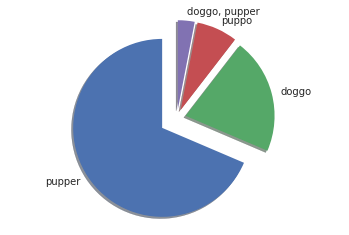

In [70]:
life_stage_count = list(df[df['stage'] != 'None']['stage'].value_counts())[0:4]
life_stages = df[df['stage'] != 'None']['stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal');


Clearly pupper is most popular life stage of pets of the posters.

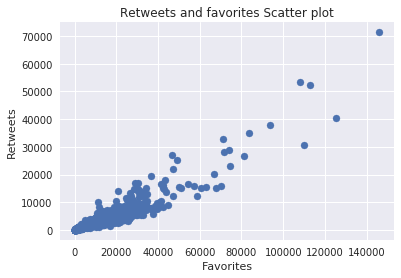

In [71]:
plt.scatter(df['favorites'], df['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');

As we expect, retweets and favorites are directly propertional to each other.

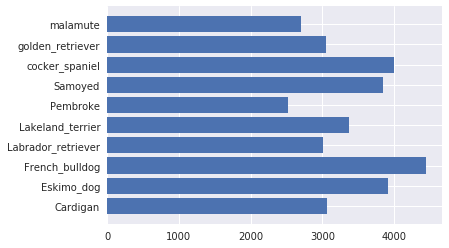

In [110]:
dfg=df[df['breed'].isin(pop_breeds)].groupby('breed',as_index=False).mean().sort_values('retweets',ascending=False).head(10)
plt.barh(dfg['breed'],dfg['retweets']);

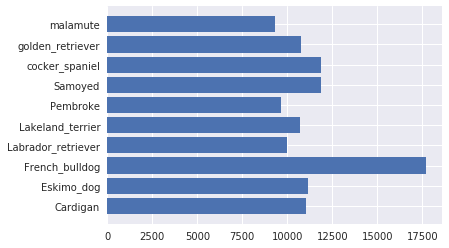

In [111]:
dfg=df[df['breed'].isin(pop_breeds)].groupby('breed',as_index=False).mean().sort_values('favorites',ascending=False).head(10)
plt.barh(dfg['breed'],dfg['favorites']);

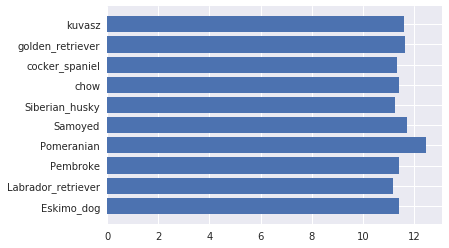

In [114]:
dfg=df[df['breed'].isin(pop_breeds)].groupby('breed',as_index=False).mean().sort_values('rating',ascending=False).head(10)
plt.barh(dfg['breed'],dfg['rating']);